<a href="https://colab.research.google.com/github/Sanjay-sundaresan/Wild-Animal-Detection/blob/main/Wild_Animal_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Dropout



```
# Segmentation Code

import skimage.io
import scipy
from skimage.io import imread
from skimage.io import imsave
import skimage.viewer
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import cv2,glob,os

path = glob.glob('/content/drive/My Drive/Animal_Dataset/train/*.jpg')
print(len(path))
i = 1

for image in range(1000):
    img = cv2.imread(path[image])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    vectorized = img.reshape((-1,3))
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 3
    attempts=10
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    
    arr=skimage.img_as_ubyte(result_image)
    imsave('/content/drive/My Drive/Animal_Dataset/TRAIN/img%i.png' % i, arr)
    i+= 1
```
  

In [ ]:
train_data_path = "/content/drive/My Drive/Animal/Train"
valid_data_path = "/content/drive/My Drive/Animal/Test"

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=30,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

training_data = training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(299,299),shuffle=True)

Found 5790 images belonging to 10 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training_data.class_indices

{'Cheetah': 0,
 'Chimpanzee': 1,
 'Elephant': 2,
 'Fox': 3,
 'Jaguars': 4,
 'Lion': 5,
 'Orangutan': 6,
 'Panda': 7,
 'Panthers': 8,
 'Rhino': 9}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(valid_data_path,
                                  target_size=(299,299),shuffle=True)

Found 894 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications import efficientnet

In [ ]:
'''mobilenet = tf.keras.applications.MobileNetV2(
    weights='imagenet', 
    include_top=False,  
    input_shape=(224,224,3)
)'''
inception = tf.keras.applications.InceptionResNetV2(
    weights='imagenet', 
    include_top=False,  
    input_shape=(299,299,3)
)
# The Convolutional Neural Network is instantiated using the pre-trained ImageNet weights
model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))
# Compiling the CNN
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(training_data, 
                          epochs=40, 
                          verbose=1, 
                          validation_data= valid_data) 

219070464/219055592 [==============================] - 1s 0us/step
Epoch 1/40
181/181 [==============================] - 2237s 12s/step - loss: 1.0995 - accuracy: 0.6627 - val_loss: 0.3922 - val_accuracy: 0.8937
Epoch 2/40
181/181 [==============================] - 147s 810ms/step - loss: 0.5068 - accuracy: 0.8451 - val_loss: 0.3914 - val_accuracy: 0.9072
Epoch 3/40
181/181 [==============================] - 148s 813ms/step - loss: 0.3715 - accuracy: 0.8938 - val_loss: 0.3747 - val_accuracy: 0.9128
Epoch 4/40
181/181 [==============================] - 147s 812ms/step - loss: 0.3133 - accuracy: 0.9048 - val_loss: 0.3310 - val_accuracy: 0.9273
Epoch 5/40
181/181 [==============================] - 147s 811ms/step - loss: 0.2694 - accuracy: 0.9171 - val_loss: 0.4272 - val_accuracy: 0.9195
Epoch 6/40
181/181 [==============================] - 146s 807ms/step - loss: 0.2198 - accuracy: 0.9373 - val_loss: 0.4149 - val_accuracy: 0.9049
Epoch 7/40
181/181 [==============================] - 146s

In [ ]:
#modelpath = 'finalAnimal.h5'
#model.save(modelpath)

In [ ]:
#!cp -r "/content/finalAnimal.h5" "/content/drive/MyDrive"

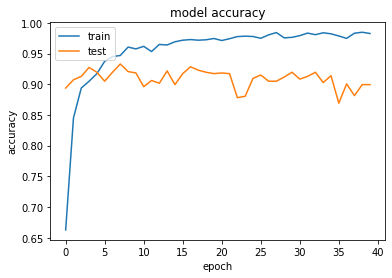

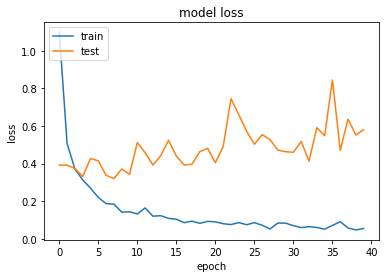

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
total = sum(history.history['accuracy'])
n = 40
print("Mean Training Accuracy: ",(total/n)*100)

Mean Training Accuracy:  95.56994795799255


In [ ]:
total = sum(history.history['val_accuracy'])
n = 40
print("Mean Testing Accuracy: ",(total/n)*100)

Mean Testing Accuracy:  90.88087290525436


In [ ]:
predictions = model.predict(valid_data)

In [ ]:
labels = tf.constant([0,1,2,3,4,5,6,7,8,9],dtype = tf.int32)

In [ ]:
predictions

array([[1.49635249e-04, 9.59507644e-01, 1.03825156e-03, ...,
        1.88401272e-03, 7.97117595e-03, 9.85840987e-03],
       [9.78355944e-01, 1.80581708e-06, 9.92369605e-05, ...,
        1.04924875e-05, 9.15834244e-05, 6.52819654e-05],
       [9.61826754e-06, 6.09554276e-02, 1.57467817e-04, ...,
        4.23946272e-04, 2.76057486e-04, 8.17345353e-05],
       ...,
       [6.47718313e-16, 2.83624085e-17, 2.93739252e-15, ...,
        7.99074670e-17, 3.47689304e-12, 2.42692727e-10],
       [3.52107108e-08, 1.67205243e-07, 2.11610381e-06, ...,
        2.44289140e-07, 1.19929078e-04, 9.99877214e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 3.40147979e-34, 1.66921808e-31]], dtype=float32)